<div style="text-align: center;">  
    <img src="./Images/Penguin.jpg" alt="Image description" style="width: 400px; height: 300px; margin-up: 10px;">  <br>
    <div style="color: blue; font-size: 40px;">Unsupervised Learning: Penguins Species</div>  
</div>

In [1]:
# Install required libraries
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("tidyr")
install.packages("corrplot")
install.packages("cluster")

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto



In [3]:
# Load necessary libraries
library(tidyverse)
library(ggplot2)
library(dplyr)  
library(tidyr)  
library(corrplot)  
library(cluster)

## Data Exploration

In [4]:
# Load Dataset:
penguins<- read.csv("./Datasets/penguins.csv")

# View the structure of the dataset
str(penguins)
summary(penguins)


'data.frame':	344 obs. of  5 variables:
 $ culmen_length_mm : num  39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ culmen_depth_mm  : num  18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int  181 186 195 NA 193 190 181 195 193 5000 ...
 $ body_mass_g      : int  3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : chr  "MALE" "FEMALE" "FEMALE" NA ...


 culmen_length_mm culmen_depth_mm flipper_length_mm  body_mass_g  
 Min.   :32.10    Min.   :13.10   Min.   :-132.0    Min.   :2700  
 1st Qu.:39.23    1st Qu.:15.60   1st Qu.: 190.0    1st Qu.:3550  
 Median :44.45    Median :17.30   Median : 197.0    Median :4050  
 Mean   :43.92    Mean   :17.15   Mean   : 214.0    Mean   :4202  
 3rd Qu.:48.50    3rd Qu.:18.70   3rd Qu.: 213.8    3rd Qu.:4750  
 Max.   :59.60    Max.   :21.50   Max.   :5000.0    Max.   :6300  
 NA's   :2        NA's   :2       NA's   :2         NA's   :2     
     sex           
 Length:344        
 Class :character  
 Mode  :character  
                   
                   
                   
                   

## Preprocessing

In [5]:
# Check for missing values
sum(is.na(penguins))

# Handle missing values (e.g., remove rows with NA)
penguins_clean <- na.omit(penguins)# Select relevant features for clustering
features <- penguins_clean %>% select(culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g)

# Normalize the features
features_scaled <- scale(features)


[1] 17

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


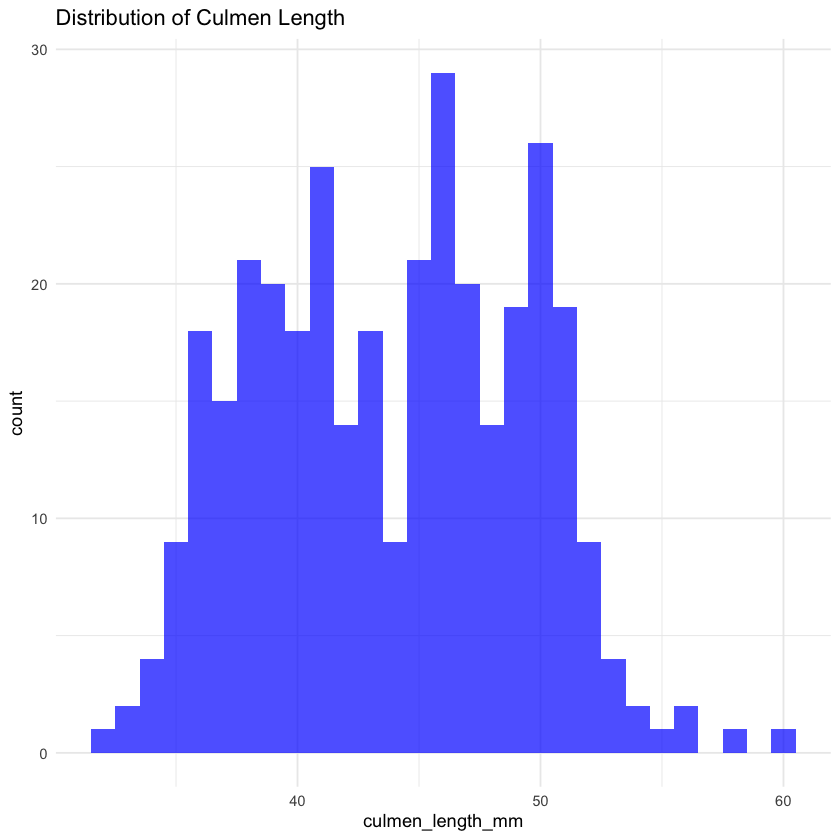

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


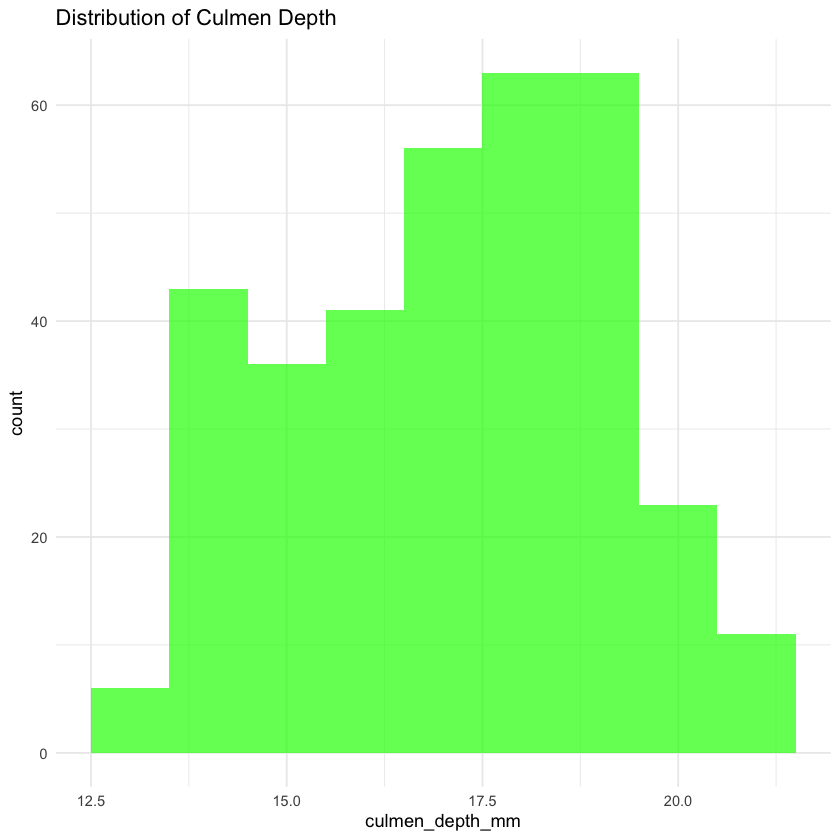

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


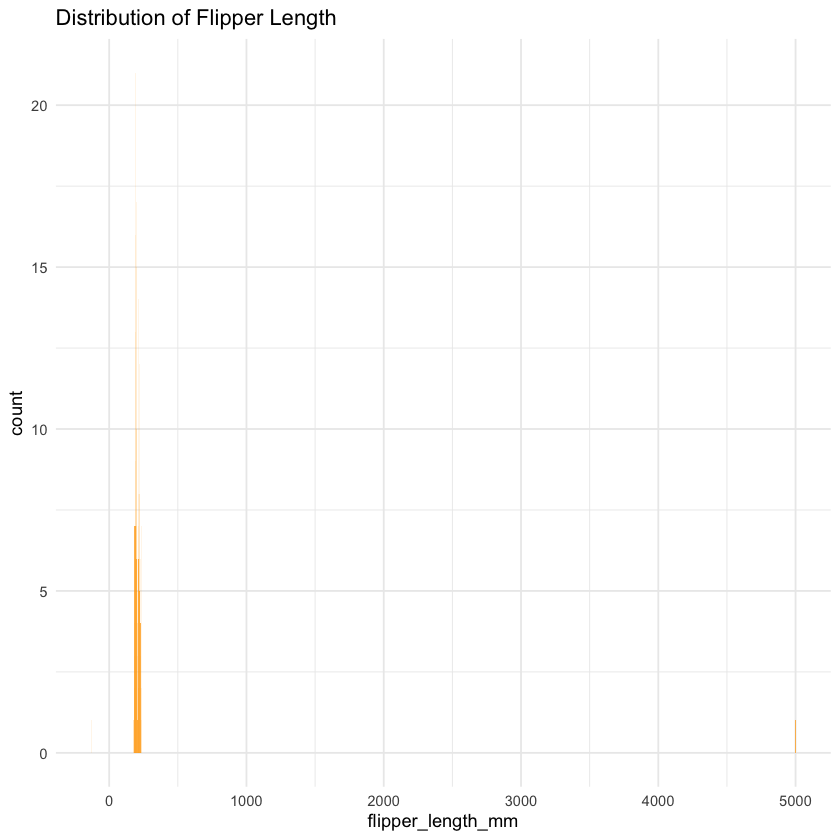

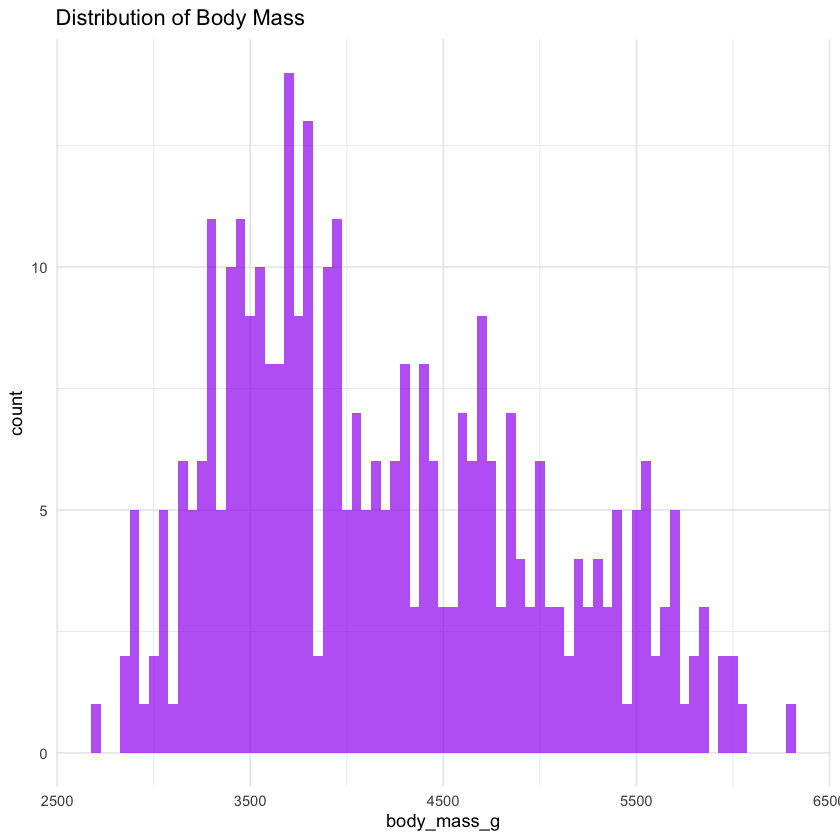

In [6]:
# Visualizing the distribution of each numerical variable  
ggplot(penguins, aes(x = culmen_length_mm)) +  
  geom_histogram(binwidth = 1, fill = "blue", alpha = 0.7) +  
  ggtitle("Distribution of Culmen Length") +  
  theme_minimal()  

ggplot(penguins, aes(x = culmen_depth_mm)) +  
  geom_histogram(binwidth = 1, fill = "green", alpha = 0.7) +  
  ggtitle("Distribution of Culmen Depth") +  
  theme_minimal()  

ggplot(penguins, aes(x = flipper_length_mm)) +  
  geom_histogram(binwidth = 1, fill = "orange", alpha = 0.7) +  
  ggtitle("Distribution of Flipper Length") +  
  theme_minimal()  

ggplot(penguins, aes(x = body_mass_g)) +  
  geom_histogram(binwidth = 50, fill = "purple", alpha = 0.7) +  
  ggtitle("Distribution of Body Mass") +  
  theme_minimal()  

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


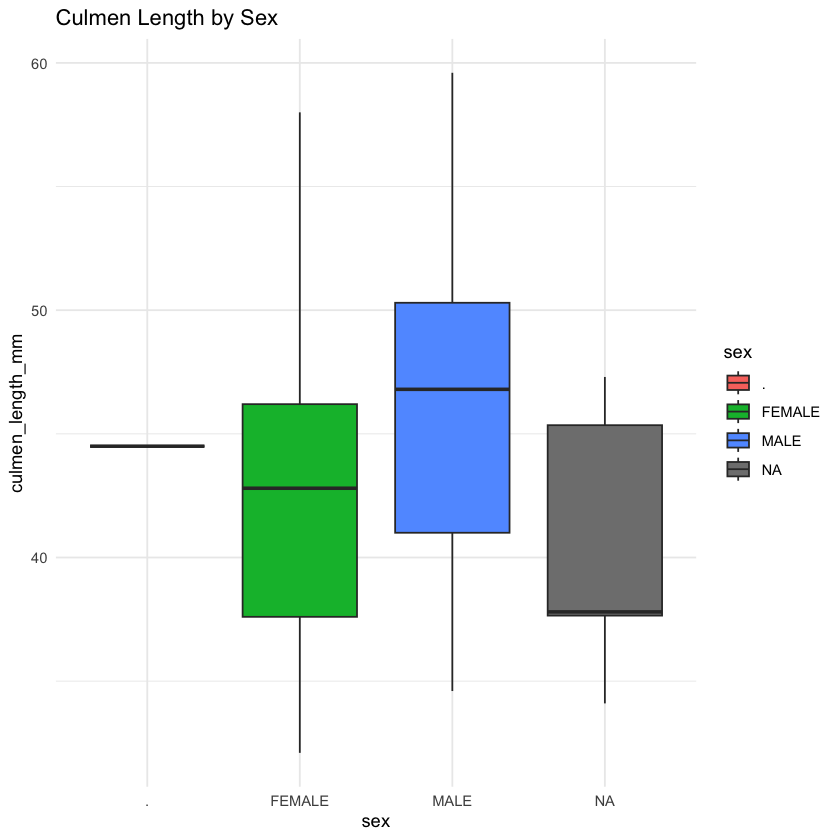

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


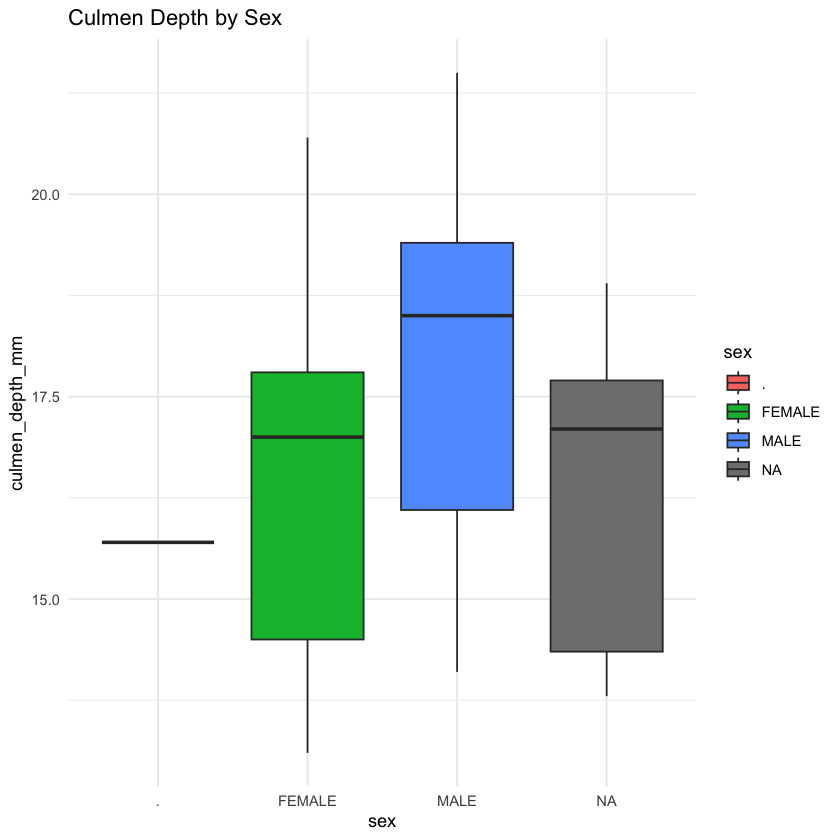

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


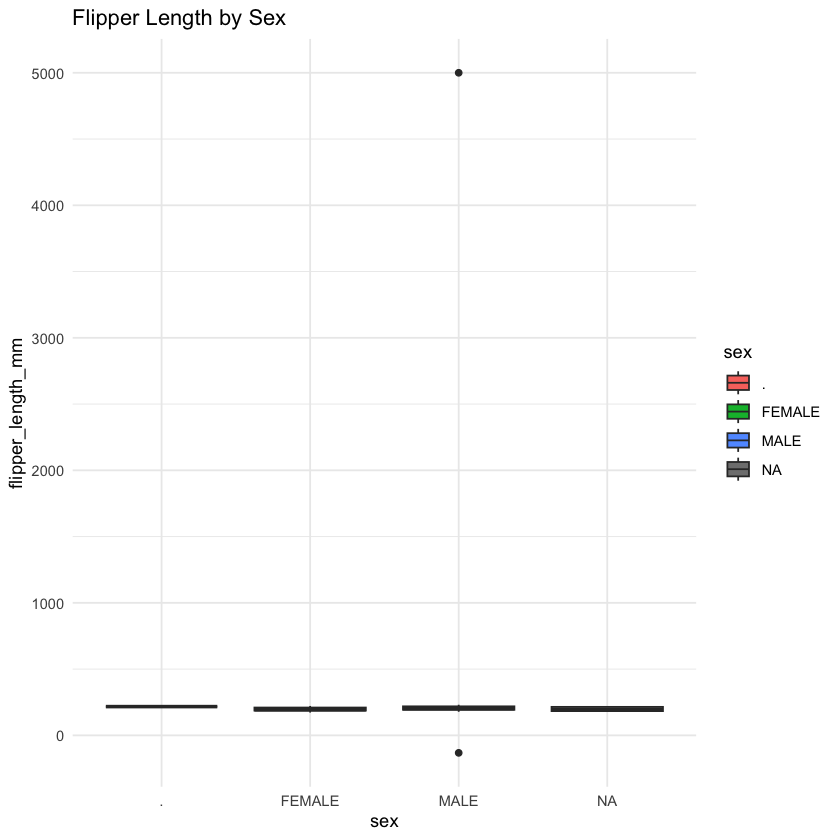

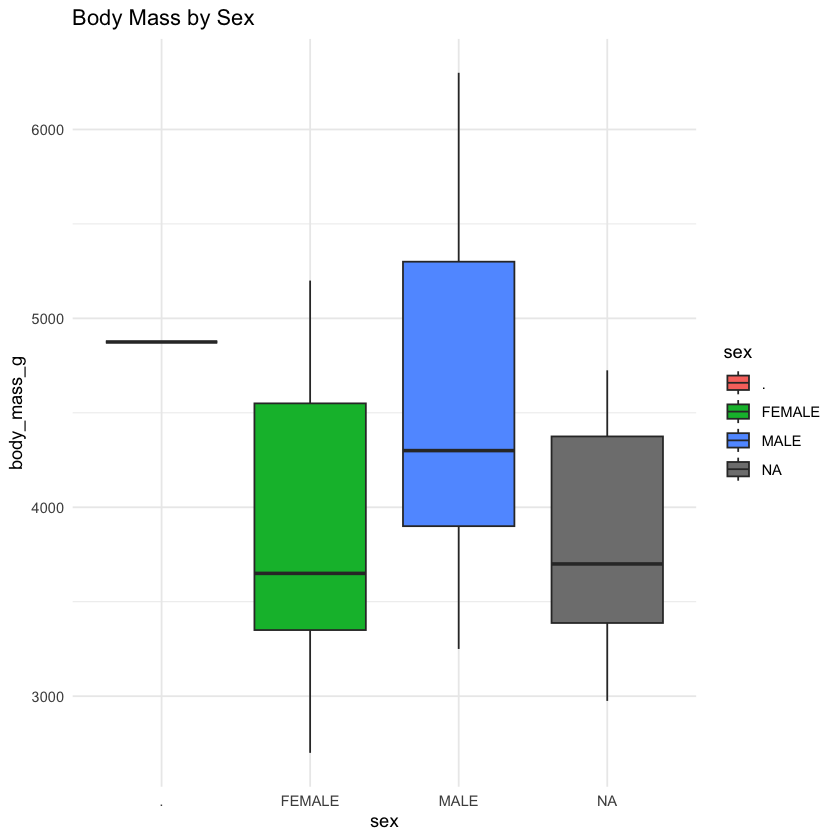

In [7]:
# Boxplots to explore the influence of sex on body measurements  
ggplot(penguins, aes(x = sex, y = culmen_length_mm, fill = sex)) +  
  geom_boxplot() +  
  ggtitle("Culmen Length by Sex") +  
  theme_minimal()  

ggplot(penguins, aes(x = sex, y = culmen_depth_mm, fill = sex)) +  
  geom_boxplot() +  
  ggtitle("Culmen Depth by Sex") +  
  theme_minimal()  

ggplot(penguins, aes(x = sex, y = flipper_length_mm, fill = sex)) +  
  geom_boxplot() +  
  ggtitle("Flipper Length by Sex") +  
  theme_minimal()  

ggplot(penguins, aes(x = sex, y = body_mass_g, fill = sex)) +  
  geom_boxplot() +  
  ggtitle("Body Mass by Sex") +  
  theme_minimal()  

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


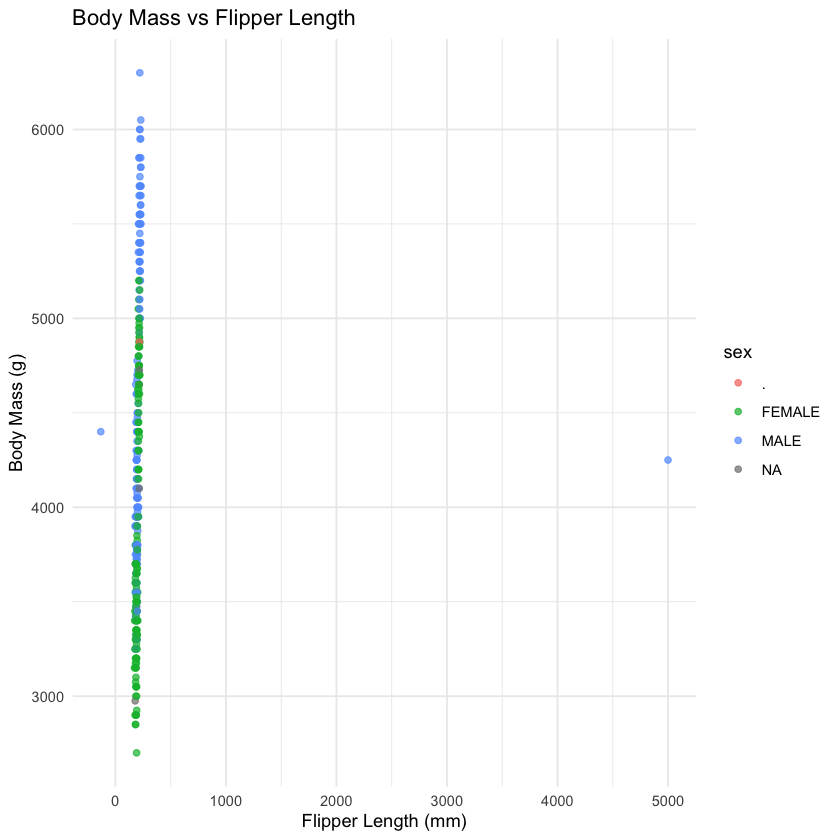

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


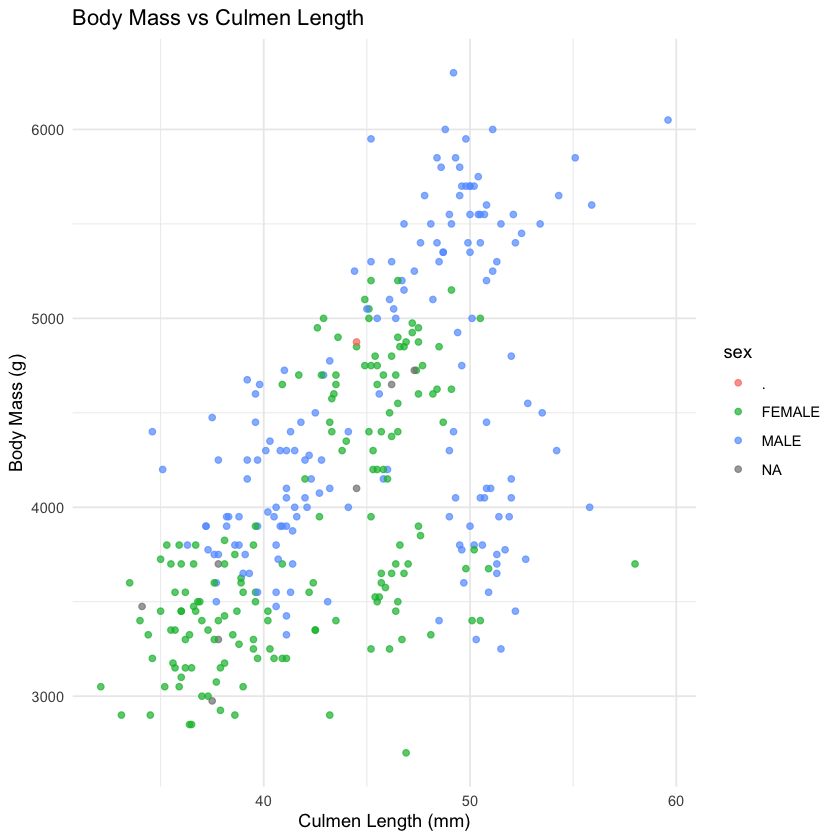

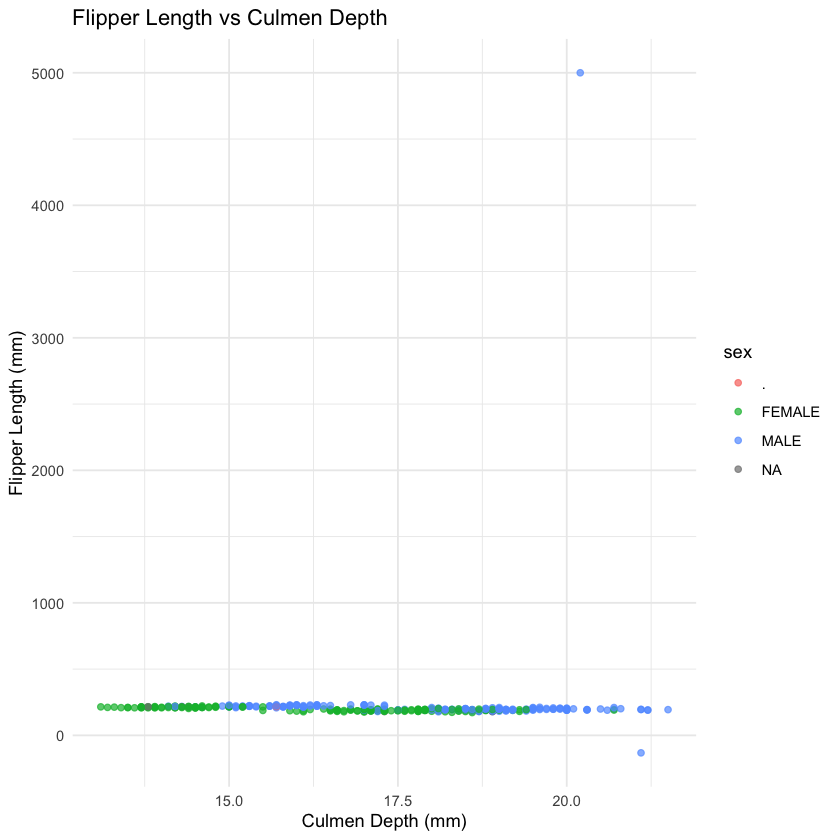

In [8]:
# Sample scatter plots for visualizing relationships  
ggplot(penguins, aes(x = flipper_length_mm, y = body_mass_g, color = sex)) +  
  geom_point(alpha = 0.7) +  
  labs(title = "Body Mass vs Flipper Length", x = "Flipper Length (mm)", y = "Body Mass (g)") +  
  theme_minimal()  

ggplot(penguins, aes(x = culmen_length_mm, y = body_mass_g, color = sex)) +  
  geom_point(alpha = 0.7) +  
  labs(title = "Body Mass vs Culmen Length", x = "Culmen Length (mm)", y = "Body Mass (g)") +  
  theme_minimal()  

ggplot(penguins, aes(x = culmen_depth_mm, y = flipper_length_mm, color = sex)) +  
  geom_point(alpha = 0.7) +  
  labs(title = "Flipper Length vs Culmen Depth", x = "Culmen Depth (mm)", y = "Flipper Length (mm)") +  
  theme_minimal()

## Choose Clustering Algorithm

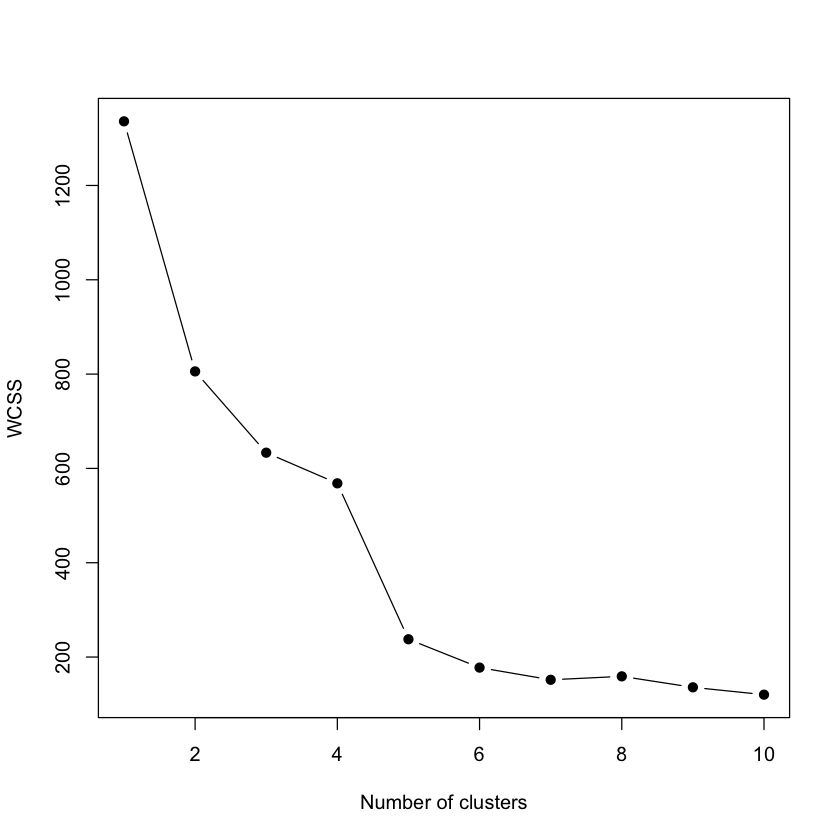

In [9]:
# Determine the number of clusters using the Elbow Method
wcss <- vector()
for (i in 1:10) {
    kmeans_model <- kmeans(features_scaled, centers = i)
    wcss[i] <- kmeans_model$tot.withinss
}
plot(1:10, wcss, type = "b", pch = 19, xlab = "Number of clusters", ylab = "WCSS")


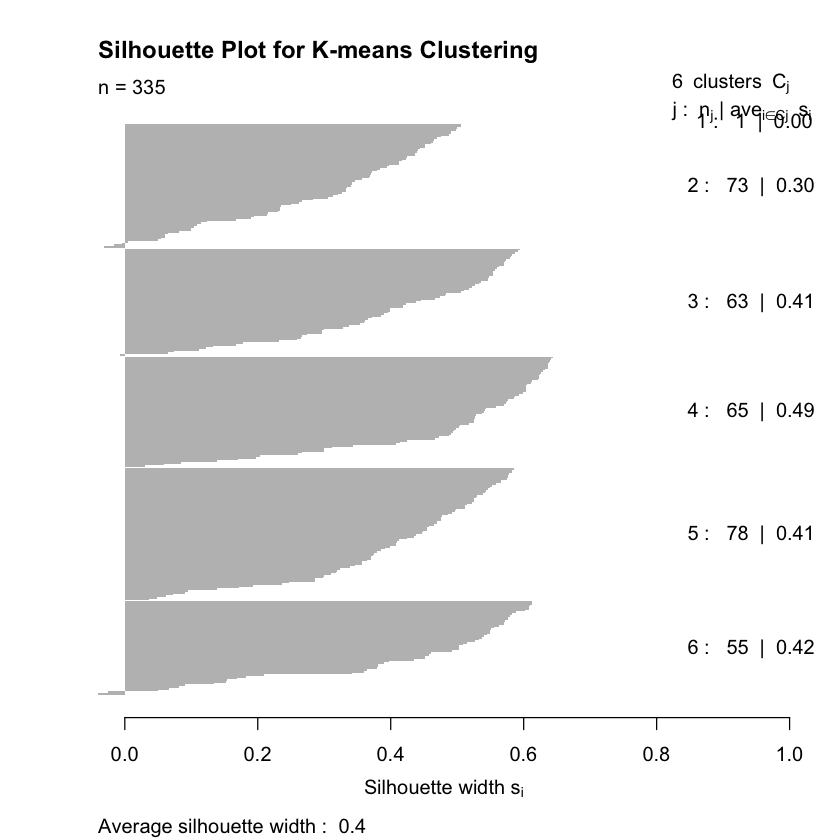

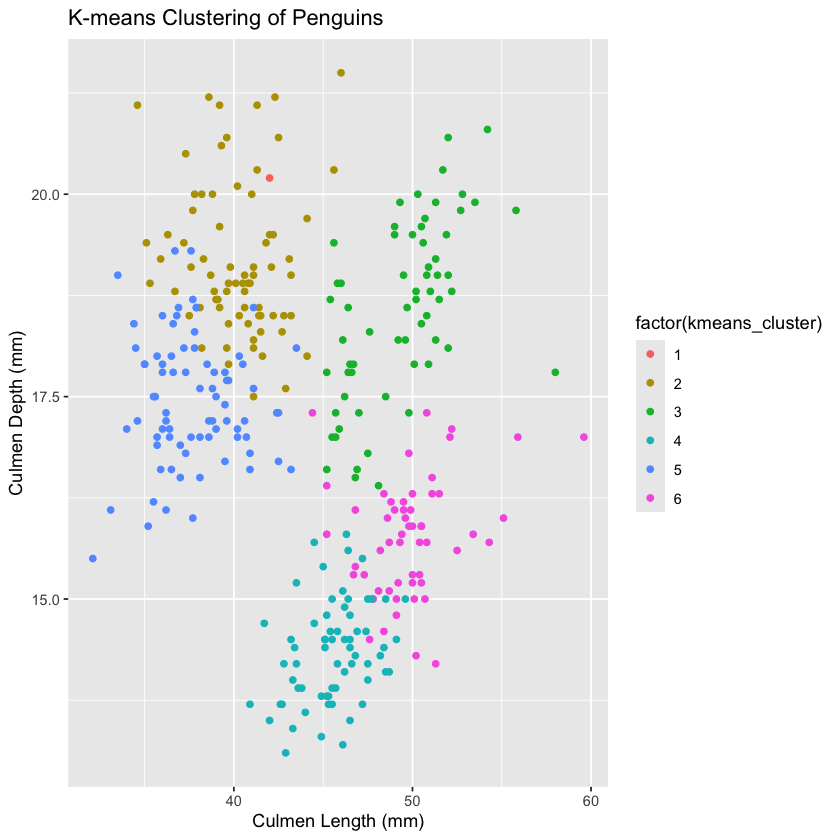

In [10]:
# Set seed for reproducibility
set.seed(123)

# Apply K-means clustering
optimal_clusters <- 6 # Optimal number from the Elbow Method
kmeans_result <- kmeans(features_scaled, centers = optimal_clusters)

# Add cluster assignments to the original dataset
penguins_clean$kmeans_cluster <- kmeans_result$cluster

# Calculate silhouette score for K-means
silhouette_kmeans <- silhouette(kmeans_result$cluster, dist(features_scaled))

# Plot silhouette score for K-means
plot(silhouette_kmeans, main = "Silhouette Plot for K-means Clustering")

# Visualize the clusters using ggplot2
ggplot(penguins_clean, aes(x = culmen_length_mm, y = culmen_depth_mm, color = factor(kmeans_cluster))) +
    geom_point() +
    labs(title = "K-means Clustering of Penguins", x = "Culmen Length (mm)", y = "Culmen Depth (mm)")


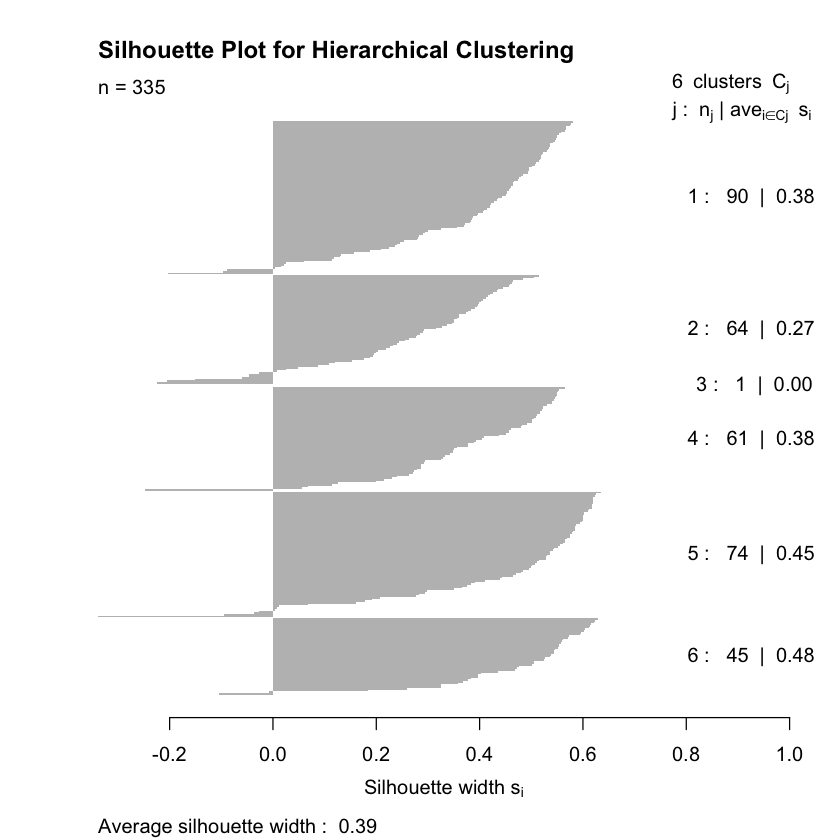

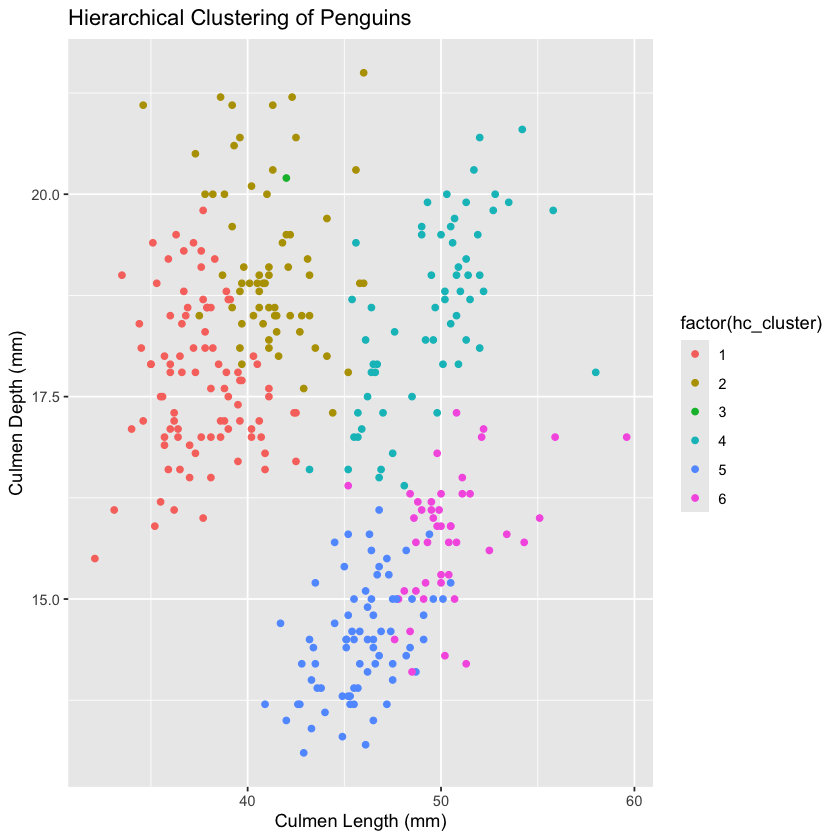

In [11]:
# Apply hierarchical clustering
hc <- hclust(dist(features_scaled), method = "ward.D2")

# Cut tree to form clusters
penguins_clean$hc_cluster <- cutree(hc, k = optimal_clusters)

# Calculate silhouette score for Hierarchical clustering
silhouette_hc <- silhouette(penguins_clean$hc_cluster, dist(features_scaled))

# Plot silhouette score for Hierarchical clustering
plot(silhouette_hc, main = "Silhouette Plot for Hierarchical Clustering")

# Visualize the clusters using ggplot2
ggplot(penguins_clean, aes(x = culmen_length_mm, y = culmen_depth_mm, color = factor(hc_cluster))) +
    geom_point() +
    labs(title = "Hierarchical Clustering of Penguins", x = "Culmen Length (mm)", y = "Culmen Depth (mm)")


## Evaluate Clustering Results

In [12]:
# Check the characteristics of each cluster for K-means
kmeans_summary <- aggregate(penguins_clean[, c("culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g")],
                            by = list(cluster = penguins_clean$kmeans_cluster), FUN = mean)

# Check the characteristics of each cluster for Hierarchical clustering
hc_summary <- aggregate(penguins_clean[, c("culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g")],
                        by = list(cluster = penguins_clean$hc_cluster), FUN = mean)

# Print summaries
print("K-means Cluster Summary:")
print(kmeans_summary)

print("Hierarchical Cluster Summary:")
print(hc_summary)


[1] "K-means Cluster Summary:"
  cluster culmen_length_mm culmen_depth_mm flipper_length_mm body_mass_g
1       1         42.00000        20.20000         5000.0000    4250.000
2       2         40.19452        19.19178          188.0959    4041.781
3       3         49.38889        18.55397          196.5397    3780.952
4       4         45.55692        14.34462          213.3231    4718.462
5       5         37.73462        17.45385          187.5385    3355.128
6       6         49.88909        15.78000          221.8545    5530.455
[1] "Hierarchical Cluster Summary:"
  cluster culmen_length_mm culmen_depth_mm flipper_length_mm body_mass_g
1       1         37.55556        17.68667          187.5778    3434.722
2       2         41.18281        19.17031          189.0469    4097.266
3       3         42.00000        20.20000         5000.0000    4250.000
4       4         49.47049        18.52295          196.3770    3751.639
5       5         45.84865        14.49459          213.9